In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
A = np.array([[0,0],
              [1,1],
              [-1,-1]])

In [46]:
A.T

array([[ 0,  1, -1],
       [ 0,  1, -1]])

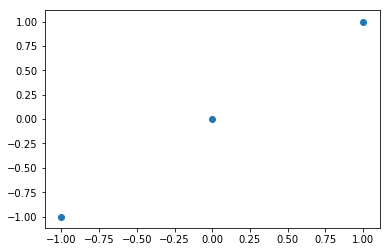

In [47]:
#we first generate a very "toy" dataset so that we know exactly the major direction
plt.scatter(A[:,0], A[:,1])
plt.show()

In [48]:
# arrange each point as as column , then take SVD
# the columns of U will be the directions of most variance
A.T 

array([[ 0,  1, -1],
       [ 0,  1, -1]])

In [66]:
u,s,vT = np.linalg.svd(A.T, full_matrices=0)

In [52]:
u

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [53]:
# we only need to care about the first singular vector since s1 >> s2
s 

array([2.00000000e+00, 1.77302319e-16])

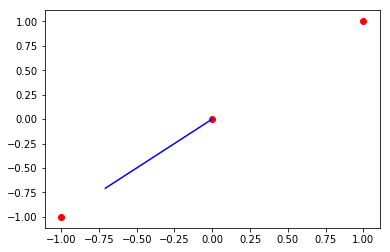

In [61]:
#The first LEFT singular vector (of U) is the vector of most variance
plt.plot([0,u[0,0]], [0,u[1,0]], c = 'b')
plt.scatter(A[:,0], A[:,1],c = 'r')
plt.show()

In [67]:
vT

array([[ 8.86511593e-17, -7.07106781e-01,  7.07106781e-01],
       [-1.00000000e+00,  9.43234100e-17, -9.43234100e-17]])

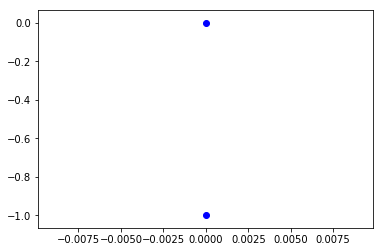

In [75]:
#the first RIGHT singular vector of vT
plt.scatter([0,vT[0,0]], [0,vT[1,0]], c = 'b')
plt.show()

In [70]:
vT[1,0]

-0.9999999999999998

In [80]:
import random

In [232]:
def get_random_ellipse(n):

    xout = np.random.uniform(size = n)*2-1 
    yout = np.zeros(n)
    y = np.zeros(n)
    y = 2*np.sqrt(1 - (xout/2)**2) + 100*np.random.normal(n)
#     yout[:(n/2)] = y[:(n/2)]
#     yout[n/2:] = (-1.0)*y[n/2:]
    return xout,y

In [233]:
x,y = get_random_ellipse(30)

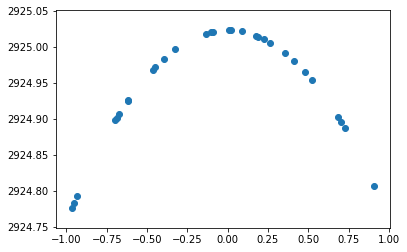

In [234]:
# let's say now we have data in an ellipse
# we know the 2 main orthogonal directions are vertical and horizontal
plt.scatter(x,y)
plt.show()

In [235]:
A = np.hstack((x.reshape(30,1),y.reshape(30,1)))

In [236]:
A.shape

(30, 2)

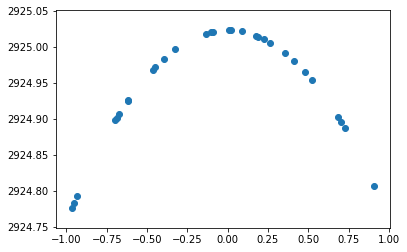

In [237]:
plt.scatter(A[:,0], A[:,1])
plt.show()

In [238]:
u,s,vT = np.linalg.svd(A.T, full_matrices=0)

In [239]:
u

array([[-2.68035922e-05,  1.00000000e+00],
       [ 1.00000000e+00,  2.68035922e-05]])

In [240]:
s

array([1.60205908e+04, 2.95333109e+00])

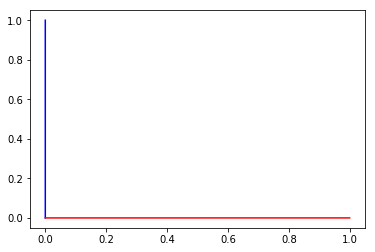

In [241]:
#The first LEFT singular vector is the vector of most variance
#They are indeed vertical and horizontal direction
plt.plot([0,u[0,0]], [0,u[1,0]], c = 'b')
plt.plot([0,u[0,1]], [0,u[1,1]], c = 'r')

plt.show()

In [243]:
# we will now "project" the data so that we can have the data in the most orthogonal way
proj = u.dot(A.T)

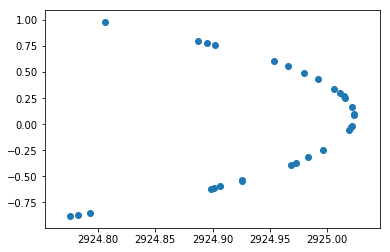

In [244]:
#we can see that proj is in our conventional x-y coordinate system but in the most separable way
plt.scatter(proj[0,:],proj[1,:])
plt.show()

In [167]:
import math

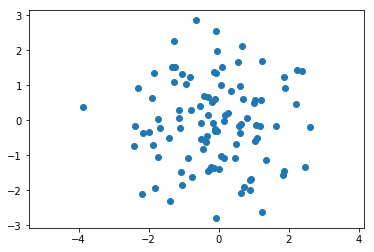

In [247]:
x = np.zeros((2,100))
x[0,:] = np.cos(np.linspace(0, 2, num=100)*math.pi) 
x[1,:] = np.sin(np.linspace(0, 2, num=100)*math.pi)
rand_mat = np.random.normal(size = (2,100))
x = x + rand_mat
#x = x + np.random.normal(size = (2,100))
plt.axis('equal')
plt.scatter(x[0,:],x[1,:])
plt.show()

In [177]:
T = np.random.randn(2,2)
T

array([[-0.46439857,  0.72198529],
       [-0.15589821,  0.55008335]])

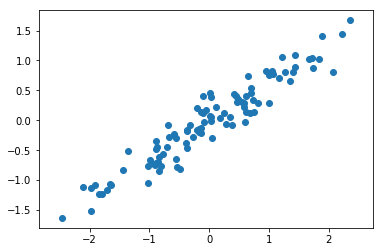

In [248]:
# now see that we have a quite complex dataset that in x-y coordinate system is not easily separable
y = T.dot(x)
plt.axis('equal')
plt.scatter(y[0,:],y[1,:])
plt.show()

In [249]:
u,s,vT = np.linalg.svd(y, full_matrices=0)

In [250]:
u

array([[-0.83900397, -0.5441253 ],
       [-0.5441253 ,  0.83900397]])

In [251]:
s

array([12.50807178,  1.73904621])

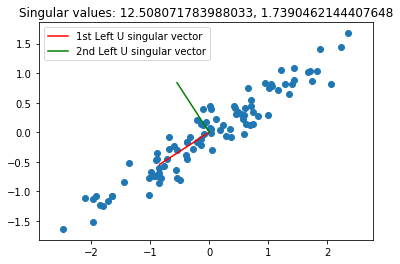

In [252]:
#The first LEFT singular vector is the vector of most variance
#We see that they really points to the direction of the 2 principal directions
plt.plot([0,u[0,0]], [0,u[1,0]], c = 'r', label = '1st Left U singular vector')
plt.plot([0,u[0,1]], [0,u[1,1]], c = 'g', label = '2nd Left U singular vector')
plt.axis('equal')
plt.scatter(y[0,:],y[1,:])
plt.title ('Singular values: {}, {}'.format(s[0],s[1]))
plt.legend()
plt.show()

In [253]:
y.shape

(2, 100)

In [254]:
vT.shape

(2, 100)

In [255]:
proj = u.dot(y)

In [256]:
# we shoud work with proj since it is projected onto the principal components already

In [257]:
proj.shape

(2, 100)

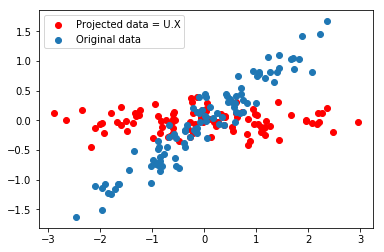

In [259]:
# We see that after the projection, we can work in our system (x-y system) in a much more meaningful way
plt.scatter(proj[0,:],proj[1,:], c = 'r', label = 'Projected data = U.X')
plt.scatter(y[0,:],y[1,:], label = 'Original data')
plt.legend()
plt.show()